<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Dennis Goßler [11140150]
* Date: 27.10.2023

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [16]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)

# hyperparameters
minPts = 2
eps = 3


def apply_dbscan(data, eps=3, min_samples=2, plot=True):
    # Apply DBSCAN to the data
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    
    # Plot the data points and color them based on their cluster label
    if plot:
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', s=40)
        plt.title('DBSCAN Clustering')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar(label='Cluster Label')
        plt.show()


The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

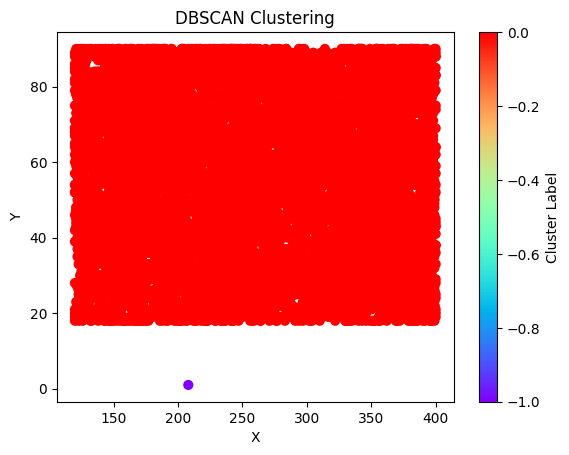

In [18]:
file_path = "data/D1-HeartAttackRist/heart_attack_prediction_dataset.csv"
column_name_1 = "Cholesterol"
column_name_2 = "Age"

df = pd.read_csv(file_path)
df = df.dropna(subset=[column_name_1, column_name_2])
data = df[[column_name_1, column_name_2]].to_numpy()


outlier_detection = DBSCAN(min_samples = minPts, eps = eps)
clusters = outlier_detection.fit_predict(data)
list(clusters).count(-1)

apply_dbscan(data)

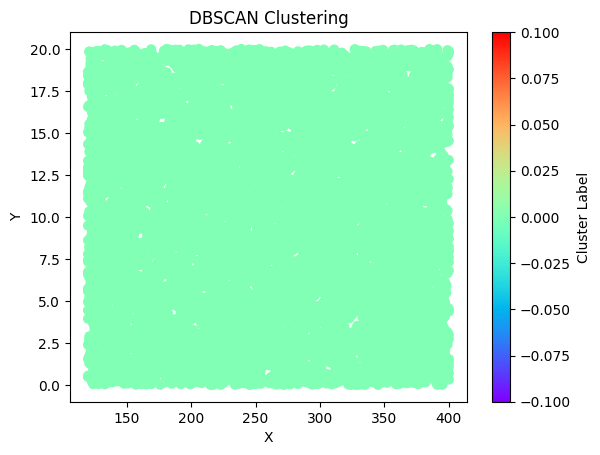

In [27]:
file_path = "data/D1-HeartAttackRist/heart_attack_prediction_dataset.csv"
column_name_1 = "Cholesterol"
column_name_2 = "Exercise Hours Per Week"

df = pd.read_csv(file_path)
df = df.dropna(subset=[column_name_1, column_name_2])
data = df[[column_name_1, column_name_2]].to_numpy()


outlier_detection = DBSCAN(min_samples = minPts, eps = eps)
clusters = outlier_detection.fit_predict(data)
list(clusters).count(-1)

apply_dbscan(data)

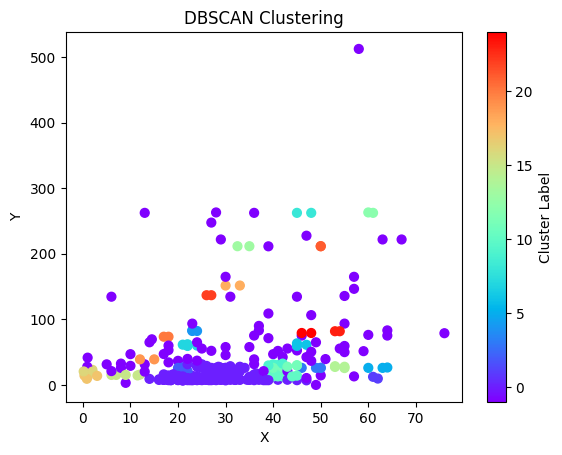

In [19]:
file_path = "data/D3-Titanic/titanic.csv"
column_name_1 = "Age"
column_name_2 = "Fare"

df = pd.read_csv(file_path)
df = df.dropna(subset=[column_name_1, column_name_2])
data = df[[column_name_1, column_name_2]].to_numpy()


outlier_detection = DBSCAN(min_samples = minPts, eps = eps)
clusters = outlier_detection.fit_predict(data)
list(clusters).count(-1)

apply_dbscan(data)